In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Khởi tạo dữ liệu
Dữ liệu được lấy trên Machine Learning cơ bản

In [2]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [3]:
X.shape

(1, 20)

In [4]:
X = X.reshape(-1, 1)

In [5]:
X.shape

(20, 1)

## Khởi tạo mô hình

In [6]:
model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

In [7]:
y_pred = model.predict(X)

In [8]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Đánh giá hiệu suất

In [9]:
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


/tmp/ipykernel_33/3348202592.py:8: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[incorrect & (y == 1)], y[incorrect & (y == 1)], facecolors='blue', edgecolors='red', marker='x', label='Class 1 (Incorrect)')


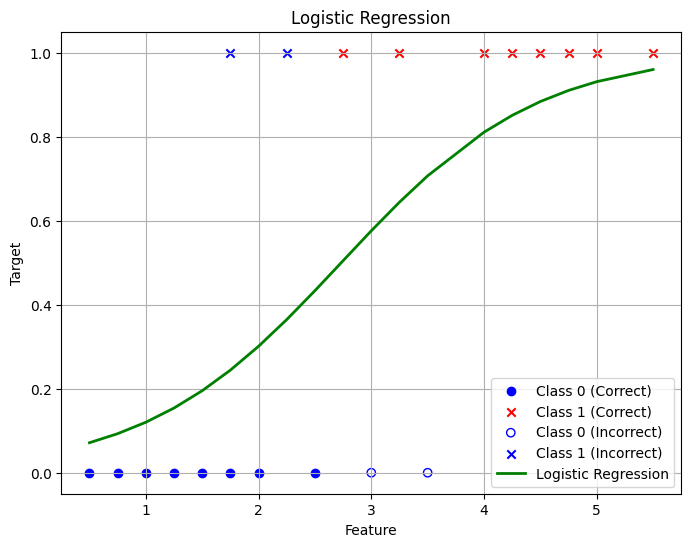

In [10]:
correct = y_pred == y
incorrect = ~correct

plt.figure(figsize=(8, 6))
plt.scatter(X[correct & (y == 0)], y[correct & (y == 0)], color='blue', marker='o', label='Class 0 (Correct)')
plt.scatter(X[correct & (y == 1)], y[correct & (y == 1)], color='red', marker='x', label='Class 1 (Correct)')
plt.scatter(X[incorrect & (y == 0)], y[incorrect & (y == 0)], facecolors='none', edgecolors='blue', marker='o', label='Class 0 (Incorrect)')
plt.scatter(X[incorrect & (y == 1)], y[incorrect & (y == 1)], facecolors='blue', edgecolors='red', marker='x', label='Class 1 (Incorrect)')
plt.plot(X, model.predict_proba(X)[:, 1], color='green', linewidth=2, label='Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

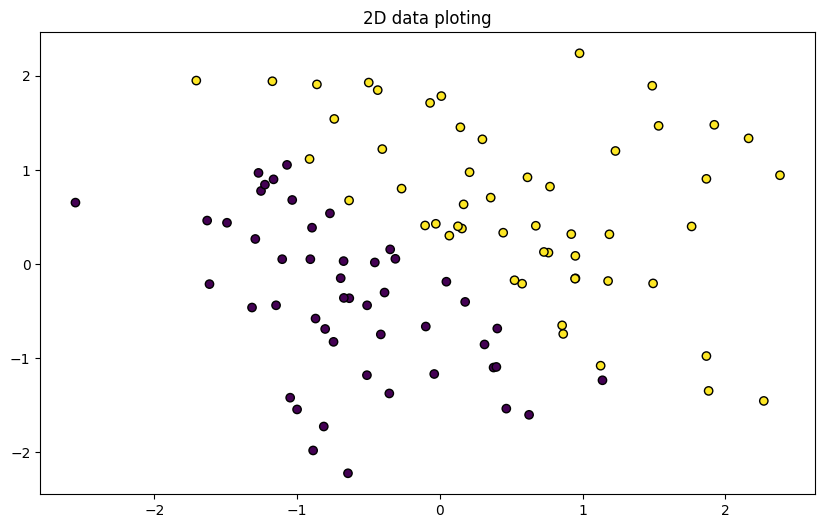

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('2D data ploting')
plt.show()


## Nhận xét:
Dữ liệu này là linear separable (tức là có thể được chia cách bằng đường thẳng, mặt phẳng...) nên ta có thể dự đoán việc dùng logistic regression sẽ hiệu quả

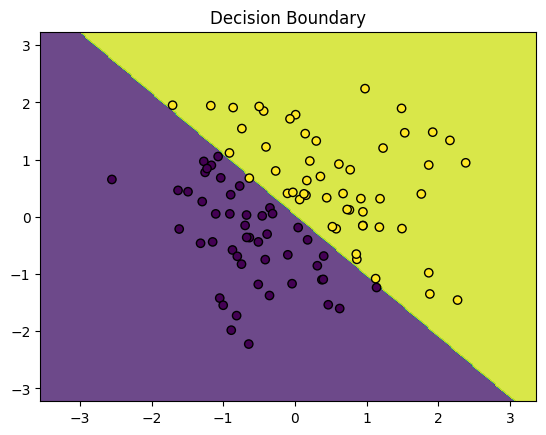

In [14]:
def plot_decision_boundary(model, X, y):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)
